<a href="https://colab.research.google.com/github/syedawajihaali/Employee-Attrition-Prediction-Using-ML/blob/main/Employee_Attrition_Prediction_HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**🧩 1. Importing Libraries**


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

##**📥 2. Loading & Exploring the Dataset**

In [5]:
data=pd.read_csv("Employees.csv")

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#numerical columns
numerical_data=data.select_dtypes(include=['int64'])
numerical_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
#catagorical columns
catagorical_data=data.select_dtypes(include=['object'])
catagorical_data.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [13]:
# numerical and catagorical columns
print(f"There are {numerical_data.shape[0]} rows and {numerical_data.shape[1]} columns in numerical data")
print(f"There are {catagorical_data.shape[0]} rows and {catagorical_data.shape[1]} columns in catagorical data")

There are 1470 rows and 26 columns in numerical data
There are 1470 rows and 9 columns in catagorical data


## **Checking for Null Values And Duplicates**

In [17]:
missing_values=data.isnull().sum()
missing_values


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [18]:
duplicate_values=data.duplicated().sum()
duplicate_values

np.int64(0)

### Seems like there are no missing or duplicate values

## **Attrition Count**

In [19]:
data['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [20]:
# Convert 'Attrition' to a categorical variable for better visualization
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

## **Attrition By Department**

Text(0, 0.5, 'Count')

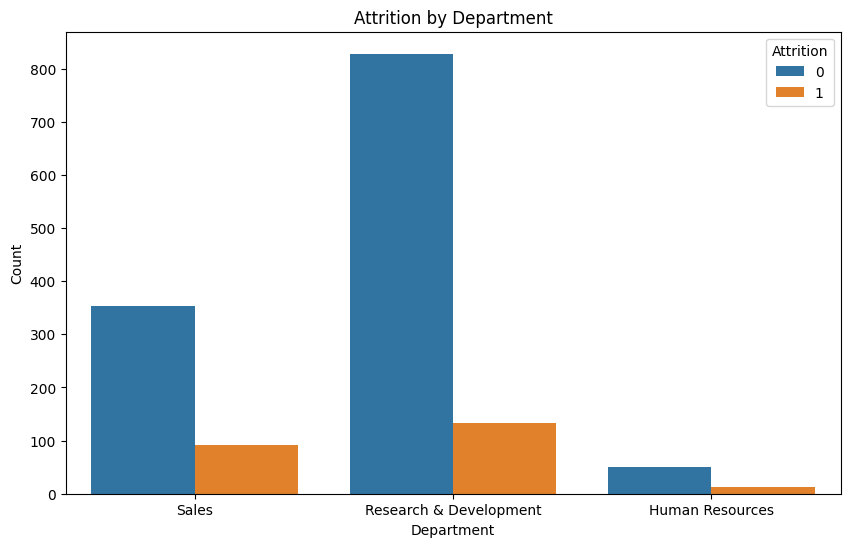

In [21]:
#Attrition by Department (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')

## **Attrition By Job Satisfaction**

Text(0, 0.5, 'Count')

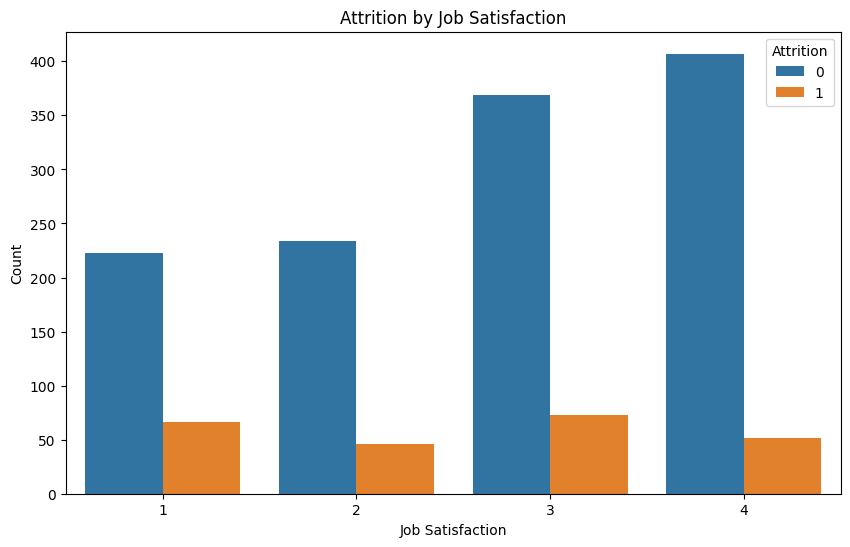

In [22]:
#Attrition by Job Satisfaction (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data)
plt.title("Attrition by Job Satisfaction")
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')

## **Attrition By OverTime**

Text(0.5, 1.0, 'Attrition By OverTime')

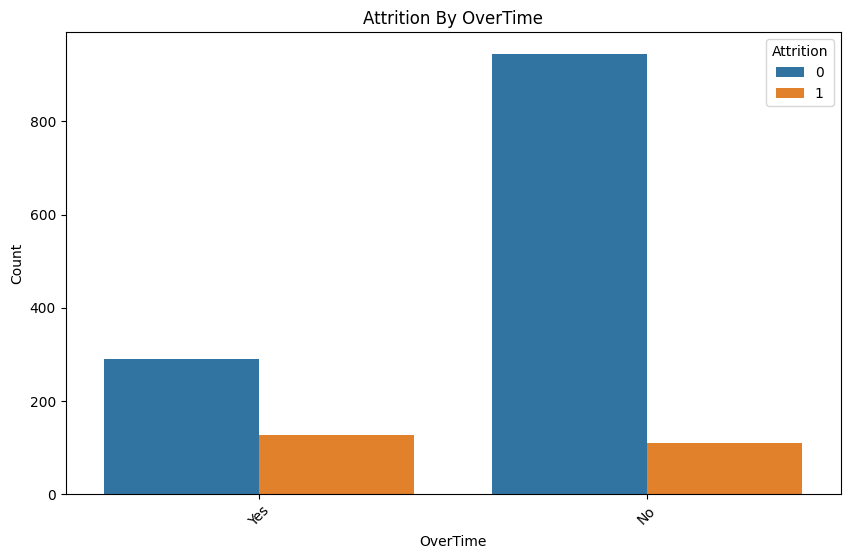

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='OverTime', hue='Attrition')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Attrition By OverTime')

## **Years at Company vs. Attrition**


Text(0, 0.5, 'Count')

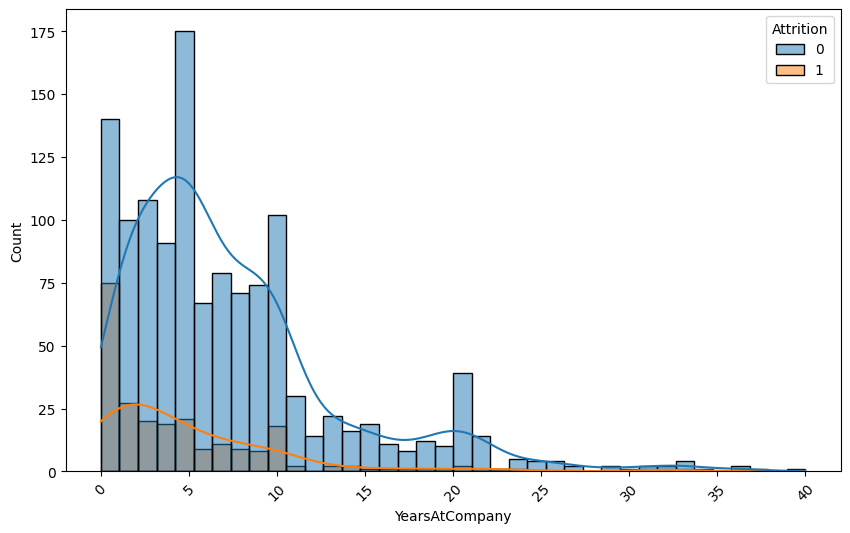

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='YearsAtCompany', hue='Attrition', kde=True)
plt.xticks(rotation=45)
plt.ylabel('Count')

## **Attrition by Job Role**


Text(0.5, 1.0, 'Attrition by Job Role')

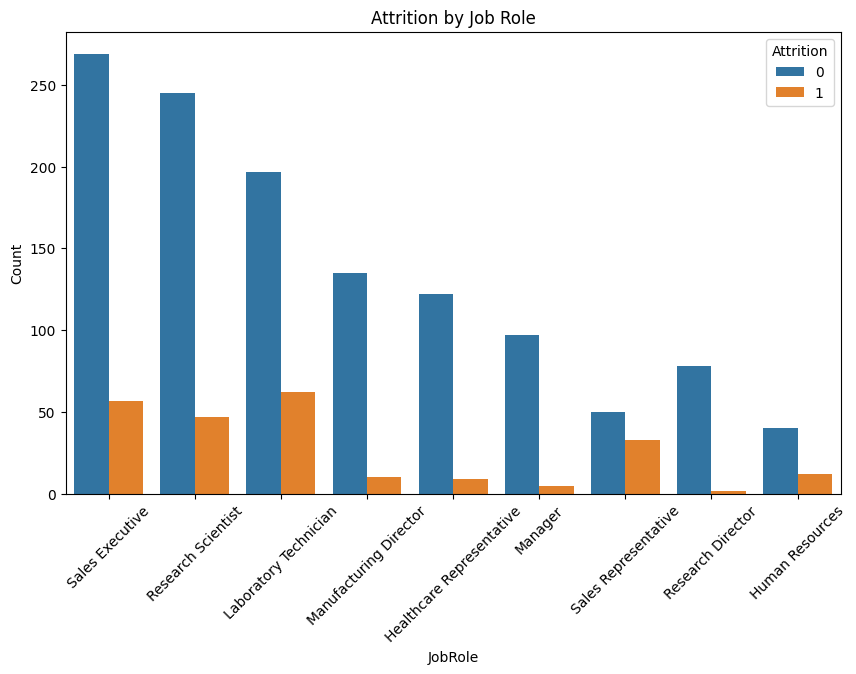

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='JobRole', hue='Attrition')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Attrition by Job Role')

## **Monthly Income vs. Attrition**


Text(0, 0.5, 'Monthly Income')

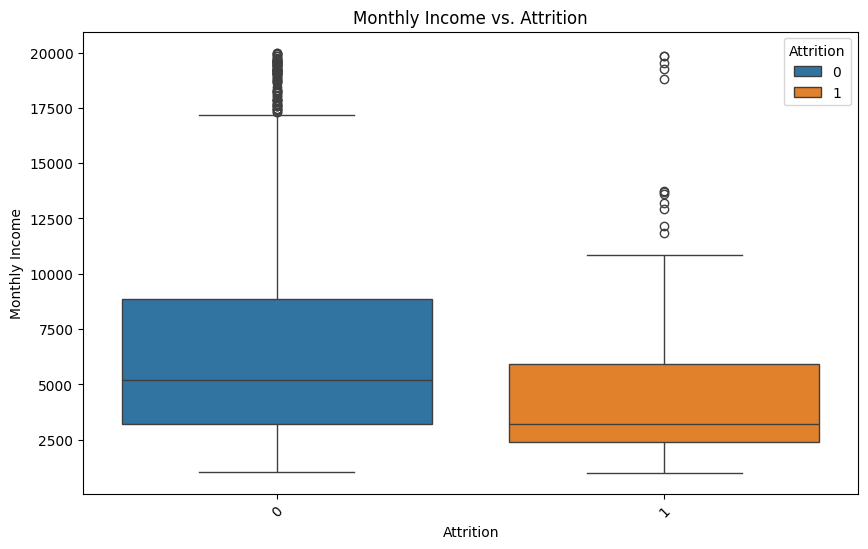

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome',hue='Attrition')
plt.xticks(rotation=45)
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')

## **Attrition vs. Distance from Home**

Text(0.5, 0, 'Attrition')

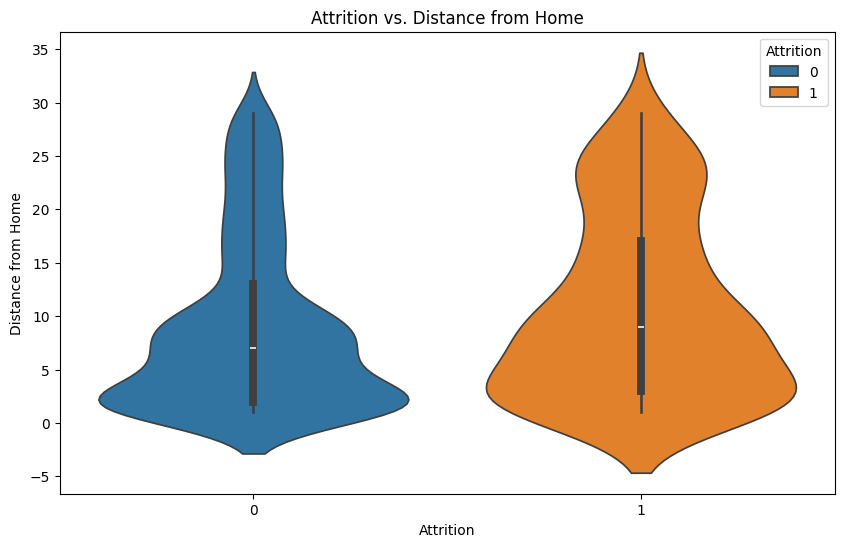

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Attrition', y='DistanceFromHome',hue='Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home')
plt.title('Attrition vs. Distance from Home')
plt.xlabel('Attrition')

## **🧪 5. Encoding Labels**

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
# encode catagorical variable
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

## **🧠 6. Train-Test Split**

In [30]:
from sklearn.model_selection import train_test_split
#spliting
x=data.drop('Attrition',axis=1)
y=data['Attrition']
#train test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## **📏 7. Standard Scaling**

In [31]:
#standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **✅ 8. Evaluate Models**

In [32]:
#logistic regression and random forest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [33]:
#train logistic regression model
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
#train random forest model
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(name, y_test, y_pred):
    print(f"{name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Logistic Regression", y_test, y_pred_lr)

Random Forest Model Evaluation:
Accuracy: 0.8435374149659864
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       240
           1       0.75      0.22      0.34        54

    accuracy                           0.84       294
   macro avg       0.80      0.60      0.63       294
weighted avg       0.83      0.84      0.81       294

Confusion Matrix:
 [[236   4]
 [ 42  12]]
--------------------------------------------------
Logistic Regression Model Evaluation:
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       240
           1       0.71      0.37      0.49        54

    accuracy                           0.86       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.84      0.86      0.84       294

Confusion Matrix:
 [[232   8]
 [ 34  20]]
-----------------------------------

## **🔍 9. SHAP for Interpretability**

In [61]:
#feature importance using shap
import shap
explainer = shap.TreeExplainer(rf, x_train)
# Disable additivity check
shap_values = explainer(x_test, check_additivity=False)

 99%|===================| 582/588 [00:11<00:00]       

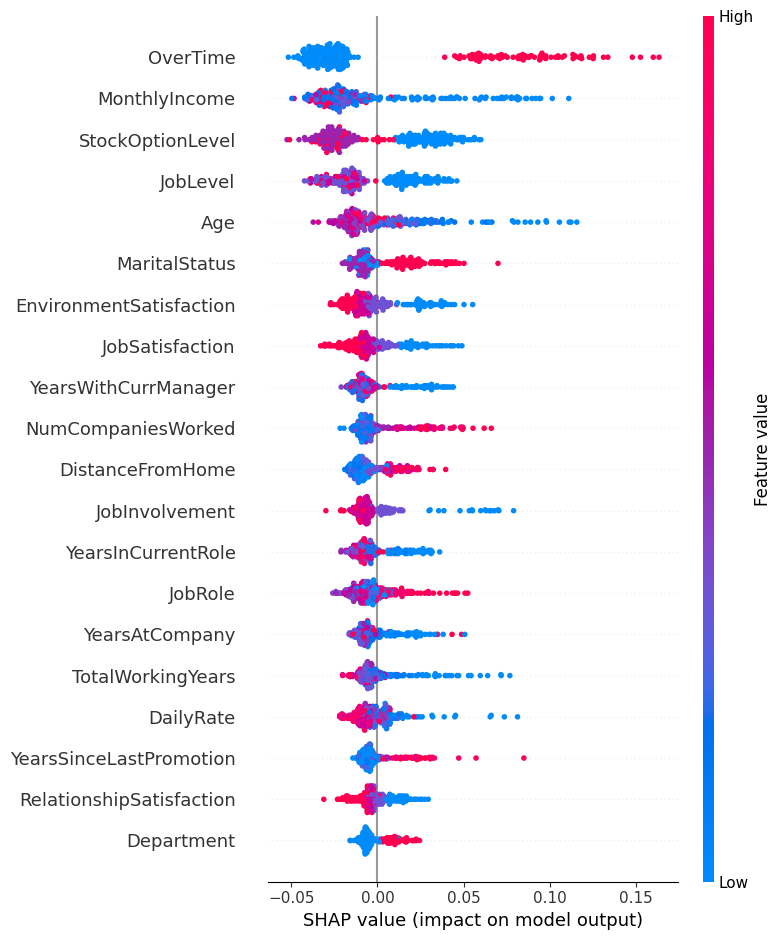

In [70]:
# SHAP Summary Plot
shap.summary_plot(shap_values[:, :, 1], x_test, feature_names=x.columns)

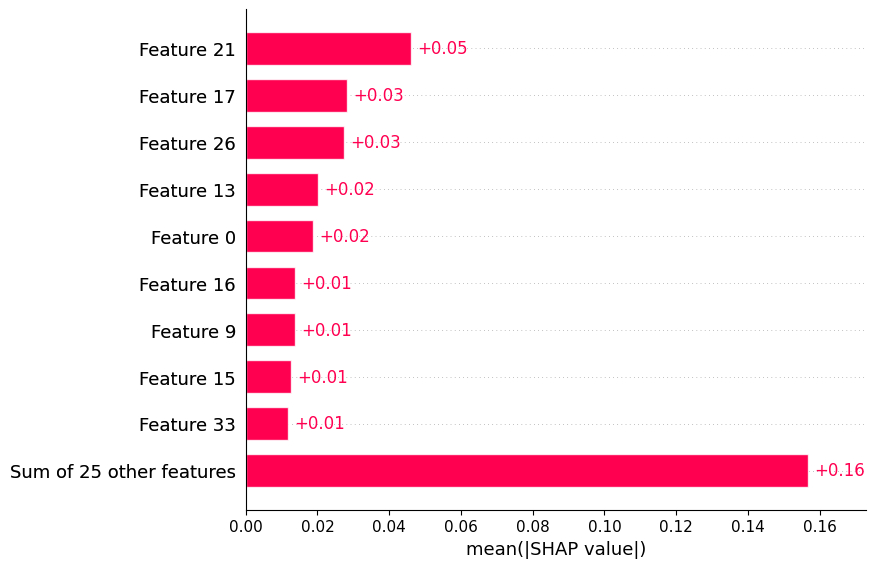

In [71]:
# SHAP Feature Importance Plot / Select the SHAP values for a specific output/class
shap.plots.bar(shap_values[:, :, 1])

# **📌 KEY INSIGHTS**

**What Makes Employees Leave (Key Factors):**

* **Too Much Overtime:** Employees working overtime are much more likely to leave. This points to burnout and a need for better work-life balance.

* **Low Monthly Income:** People earning less each month are more likely to quit, showing that fair and competitive pay is a major factor in retaining staff.

* **Fewer Stock Options:** Employees with lower stock option levels are more prone to leaving, suggesting that equity and long-term financial incentives matter.

* **Lower Job Level:** Employees in lower positions are more likely to leave, possibly because they feel stuck or underappreciated.

* **Younger Employees:** Younger workers or those earlier in their careers seem more likely to leave, maybe due to ambition or better opportunities elsewhere.

* **Less Job or Environment Satisfaction:** If someone isn’t happy with their job or the work environment, they’re more likely to leave — no surprise there.

By tackling these areas, we can hopefully reduce the number of employees leaving and keep our talented people around.